In [1]:
%matplotlib inline


# Active Contour Model

The active contour model is a method to fit open or closed splines to lines or
edges in an image [1]_. It works by minimising an energy that is in part
defined by the image and part by the spline's shape: length and smoothness. The
minimization is done implicitly in the shape energy and explicitly in the
image energy.

In the following two examples the active contour model is used (1) to segment
the face of a person from the rest of an image by fitting a closed curve
to the edges of the face and (2) to find the darkest curve between two fixed
points while obeying smoothness considerations. Typically it is a good idea to
smooth images a bit before analyzing, as done in the following examples.

We initialize a circle around the astronaut's face and use the default boundary
condition ``boundary_condition='periodic'`` to fit a closed curve. The default
parameters ``w_line=0, w_edge=1`` will make the curve search towards edges,
such as the boundaries of the face.

.. [1] *Snakes: Active contour models*. Kass, M.; Witkin, A.; Terzopoulos, D.
       International Journal of Computer Vision 1 (4): 321 (1988).
       :DOI:`10.1007/BF00133570`


(512, 512)


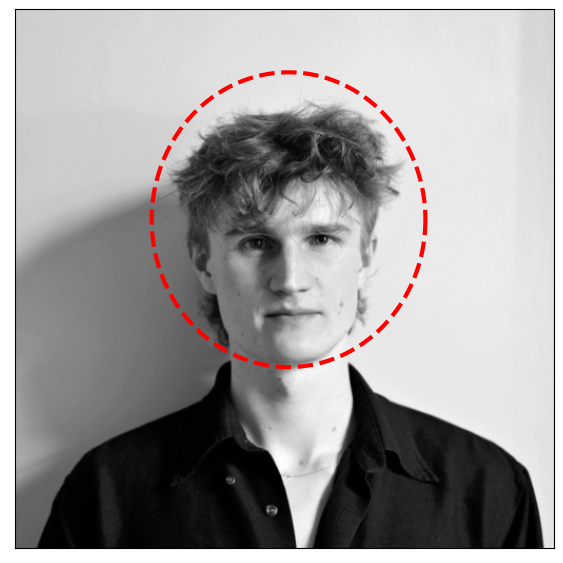

In [134]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour
from skimage import io
from skimage.transform import resize
from skimage import exposure


# img = data.astronaut()
img = io.imread('imgs/ed.jpg')
img = resize(img,(512,512))
# img = exposure.adjust_sigmoid(img,cutoff=3, gain=2)
# img = exposure.rescale_intensity(img,(0,0.8),(0,1))
# img = exposure.adjust_gamma(img, gamma=2, gain=10)
# img = exposure.adjust_log(img, gain = 1)
img = rgb2gray(img)
print(img.shape)

s = np.linspace(0, 2*np.pi, 800)
# r = 1400 + 1000*np.sin(s)
# c = 1700 + 1000*np.cos(s)
r = 200 + 140*np.sin(s)
c = 260 + 130*np.cos(s)
init = np.array([r, c]).T

# snake = active_contour(gaussian(img, 3, preserve_range=False),
#                        init, alpha=0.015, beta=10, gamma=0.001)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
# ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()

(0.0, 512.0, 512.0, 0.0)

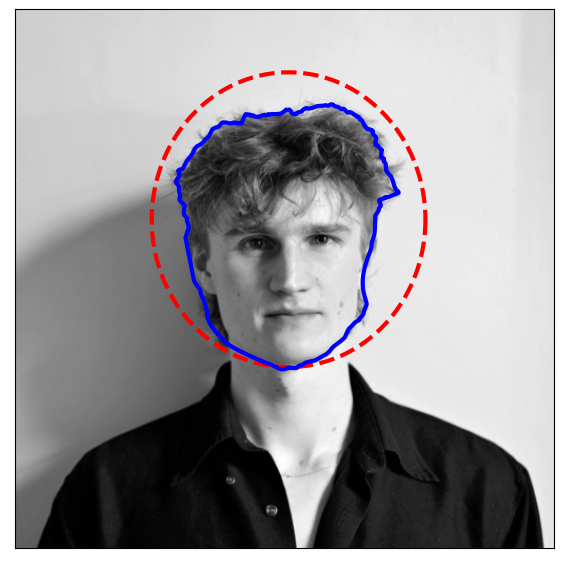

In [139]:
# snake = active_contour(gaussian(img, 3, preserve_range=False),
#                        init, alpha=0.015, beta=0.001, gamma=0.001)
snake = active_contour(img,
                       init, alpha=0.015, beta=50, gamma=0.001)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

Here we initialize a straight line between two points, `(5, 136)` and
`(424, 50)`, and require that the spline has its end points there by giving
the boundary condition `boundary_condition='fixed'`. We furthermore
make the algorithm search for dark lines by giving a negative `w_line` value.



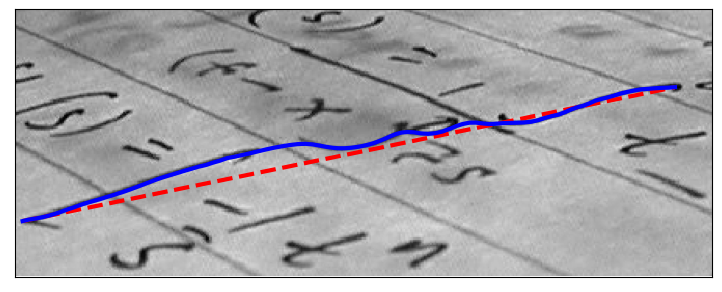

In [3]:
img = data.text()

r = np.linspace(136, 50, 100)
c = np.linspace(5, 424, 100)
init = np.array([r, c]).T

snake = active_contour(gaussian(img, 1, preserve_range=False),
                       init, boundary_condition='fixed',
                       alpha=0.1, beta=1.0, w_line=-5, w_edge=0, gamma=0.1)

fig, ax = plt.subplots(figsize=(9, 5))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()